# Task 1 - Feed-Forward Neural Networks

Consider the [California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) that was studied and extensively discussed in the
lectures.

The goal of this exercise is to implement a feed-forward neutral network (FFNN) for prediction of continuous target variable (i.e., the house prices in California). Please note that
you do not have to use Keras to implement your FFNN models—you are free to choose any
package/library you like.

(a) <b>Data preprocessing:</b>  
On top of the data preprocessing that was considered in the lectures, process your dataset further by standardizing the features.


In [ ]:
# Import / install relevant Python packages
import numpy as np
from numpy import (where, unique)
import pandas as pd
from pandas import set_option
import datetime as dt
import statsmodels.api as sm
from scipy.stats import (randint, loguniform, multivariate_normal)

from collections import Counter

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (classification_report, confusion_matrix)
from sklearn.model_selection import GridSearchCV

from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV)
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_val_score,GridSearchCV, train_test_split
from sklearn.model_selection import cross_validate


import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('ggplot')
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# Get data
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [ ]:
# Create a dataframe
df_california_housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df_california_housing['MedHouseVal'] = california_housing.target
df_california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


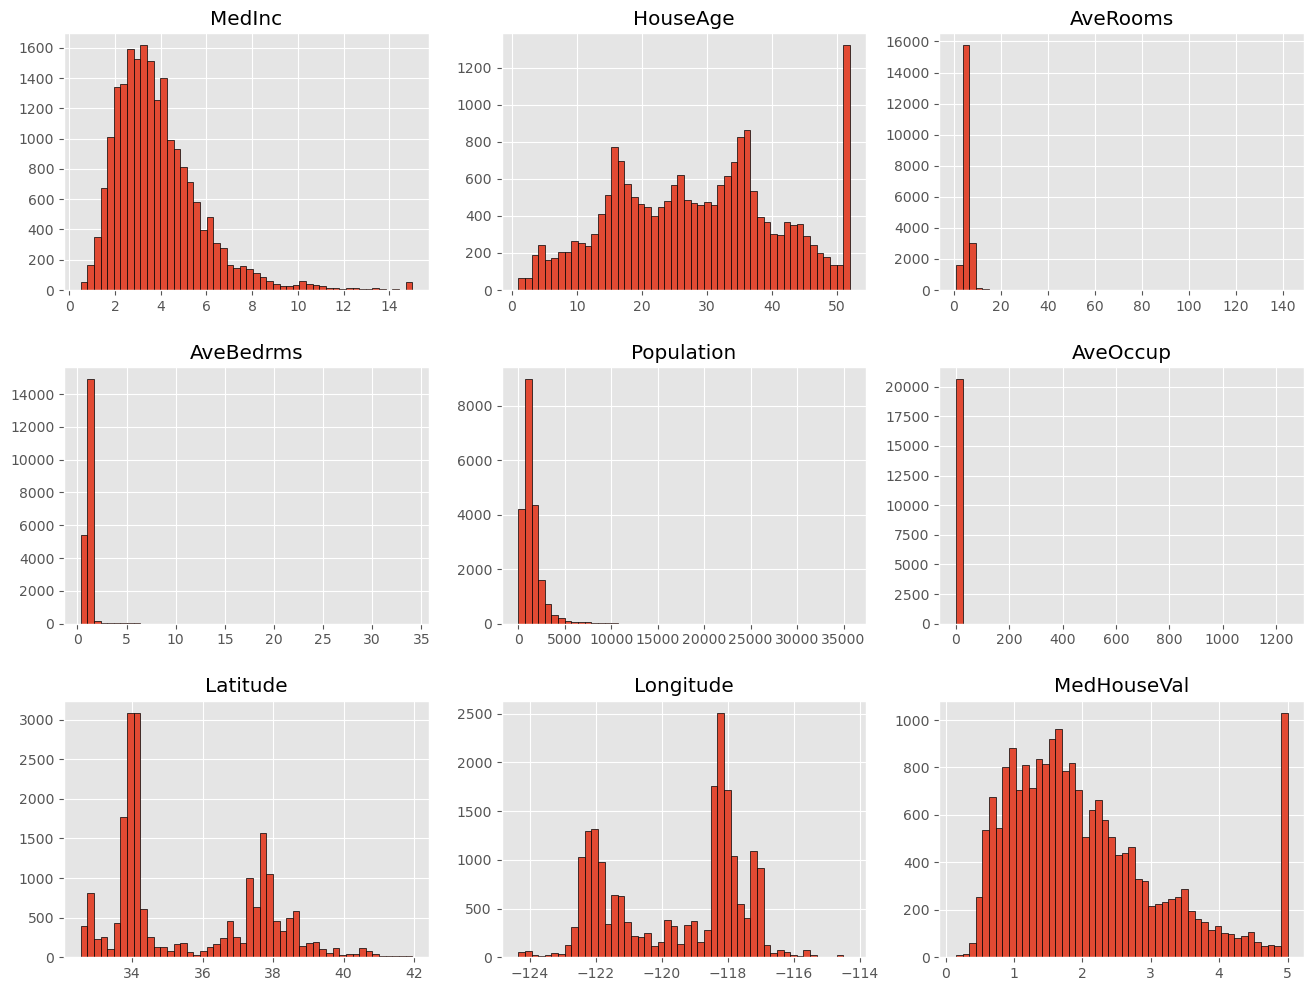

In [ ]:
# Plot features
df_california_housing.hist(figsize=(16, 12), bins=50, edgecolor='black')
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

In [ ]:
#Train test split data that has not been filtered manually or by mahalanobis for outliers
X_train, X_test, y_train, y_test = train_test_split(df_california_housing.drop("MedHouseVal", axis=1),
 df_california_housing.MedHouseVal, test_size=0.3, random_state=42)

# same for df_california_housing_mahalanobis and df_california_housing_filtered

In [ ]:
#standard scaling 

std_x_scalar = StandardScaler().fit(X_train)
std_y_scalar = StandardScaler().fit(np.array(y_train).reshape(-1, 1))


In [ ]:
X_scaled_train = std_x_scalar.transform(X_train)
X_scaled_test = std_x_scalar.transform(X_test)

y_scaled_train = std_y_scalar.transform(np.array(y_train).reshape(-1, 1))
y_scaled_test = std_y_scalar.transform(np.array(y_test).reshape(-1, 1))

(b) <b>Implementation:</b>  
Implement an arbitrary (e.g., two or three-layer) FFNN model and compare its in-sample and out-of-sample performance with the supervised learning models considered in the Machine Learning Homework 2.

In [ ]:
X_scaled_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [ ]:
y_scaled_train.shape

(14448, 1)

In [ ]:
# Step 1: Instantiate the FFNN model and specify its architecture
ffnn_model = Sequential(name='FFNN_Model') 
ffnn_model.add(Dense(8, activation='relu', kernel_initializer='he_uniform', input_dim=X_scaled_train.shape[1], name='Hidden_Layer_1')) 
ffnn_model.add(Dense(4, activation='relu', kernel_initializer='he_uniform', name='Hidden_Layer_2'))
ffnn_model.add(Dense(1, activation='sigmoid', name='Output_Layer')) 

In [ ]:
# Step 2: Compile the model
ffnn_model.compile(
    optimizer='adam', 
    loss='mse',
    metrics=['mse']
)

In [ ]:
# Step 3: Fit the model
n_epochs     = 500
n_batch_size = 1024 

ffnn_model_ccd = ffnn_model.fit(
    X_scaled_train, 
    y_scaled_train, 
    epochs=n_epochs, 
    batch_size=n_batch_size, 
    validation_data=(X_scaled_test, y_scaled_test)
)

Epoch 1/500
15/15 [==============================] - 1s 10ms/step - loss: 1.4760 - mse: 1.4760 - val_loss: 1.4288 - val_mse: 1.4288
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 1.4263 - mse: 1.4263 - val_loss: 1.3769 - val_mse: 1.3769
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 1.3746 - mse: 1.3746 - val_loss: 1.3262 - val_mse: 1.3262
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 1.3262 - mse: 1.3262 - val_loss: 1.2808 - val_mse: 1.2808
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 1.2839 - mse: 1.2839 - val_loss: 1.2427 - val_mse: 1.2427
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 1.2478 - mse: 1.2478 - val_loss: 1.2107 - val_mse: 1.2107
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 1.2182 - mse: 1.2182 - val_loss: 1.1863 - val_mse: 1.1863
Epoch 8/500
15/15 [==============================] - 0s 3ms/step - loss: 1.1961 - 

Epoch 125/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7610 - mse: 0.7610 - val_loss: 0.7511 - val_mse: 0.7511
Epoch 126/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7593 - mse: 0.7593 - val_loss: 0.7495 - val_mse: 0.7495
Epoch 127/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7576 - mse: 0.7576 - val_loss: 0.7480 - val_mse: 0.7480
Epoch 128/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7560 - mse: 0.7560 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 129/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7544 - mse: 0.7544 - val_loss: 0.7449 - val_mse: 0.7449
Epoch 130/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7529 - mse: 0.7529 - val_loss: 0.7434 - val_mse: 0.7434
Epoch 131/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7513 - mse: 0.7513 - val_loss: 0.7419 - val_mse: 0.7419
Epoch 132/500
15/15 [==============================] - 0s 3ms/step - 

Epoch 248/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6562 - mse: 0.6562 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 249/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6559 - mse: 0.6559 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 250/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6554 - mse: 0.6554 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 251/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6551 - mse: 0.6551 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 252/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6548 - mse: 0.6548 - val_loss: 0.6483 - val_mse: 0.6483
Epoch 253/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6544 - mse: 0.6544 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 254/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6539 - mse: 0.6539 - val_loss: 0.6475 - val_mse: 0.6475
Epoch 255/500
15/15 [==============================] - 0s 3ms/step - 

Epoch 371/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6239 - mse: 0.6239 - val_loss: 0.6187 - val_mse: 0.6187
Epoch 372/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6236 - mse: 0.6236 - val_loss: 0.6182 - val_mse: 0.6182
Epoch 373/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6235 - mse: 0.6235 - val_loss: 0.6183 - val_mse: 0.6183
Epoch 374/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6234 - mse: 0.6234 - val_loss: 0.6181 - val_mse: 0.6181
Epoch 375/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6232 - mse: 0.6232 - val_loss: 0.6178 - val_mse: 0.6178
Epoch 376/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6230 - mse: 0.6230 - val_loss: 0.6178 - val_mse: 0.6178
Epoch 377/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6228 - mse: 0.6228 - val_loss: 0.6176 - val_mse: 0.6176
Epoch 378/500
15/15 [==============================] - 0s 3ms/step - 

Epoch 494/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6098 - mse: 0.6098 - val_loss: 0.6054 - val_mse: 0.6054
Epoch 495/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6098 - mse: 0.6098 - val_loss: 0.6055 - val_mse: 0.6055
Epoch 496/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6096 - mse: 0.6096 - val_loss: 0.6052 - val_mse: 0.6052
Epoch 497/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6096 - mse: 0.6096 - val_loss: 0.6052 - val_mse: 0.6052
Epoch 498/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6095 - mse: 0.6095 - val_loss: 0.6051 - val_mse: 0.6051
Epoch 499/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6094 - mse: 0.6094 - val_loss: 0.6053 - val_mse: 0.6053
Epoch 500/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6094 - mse: 0.6094 - val_loss: 0.6051 - val_mse: 0.6051


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


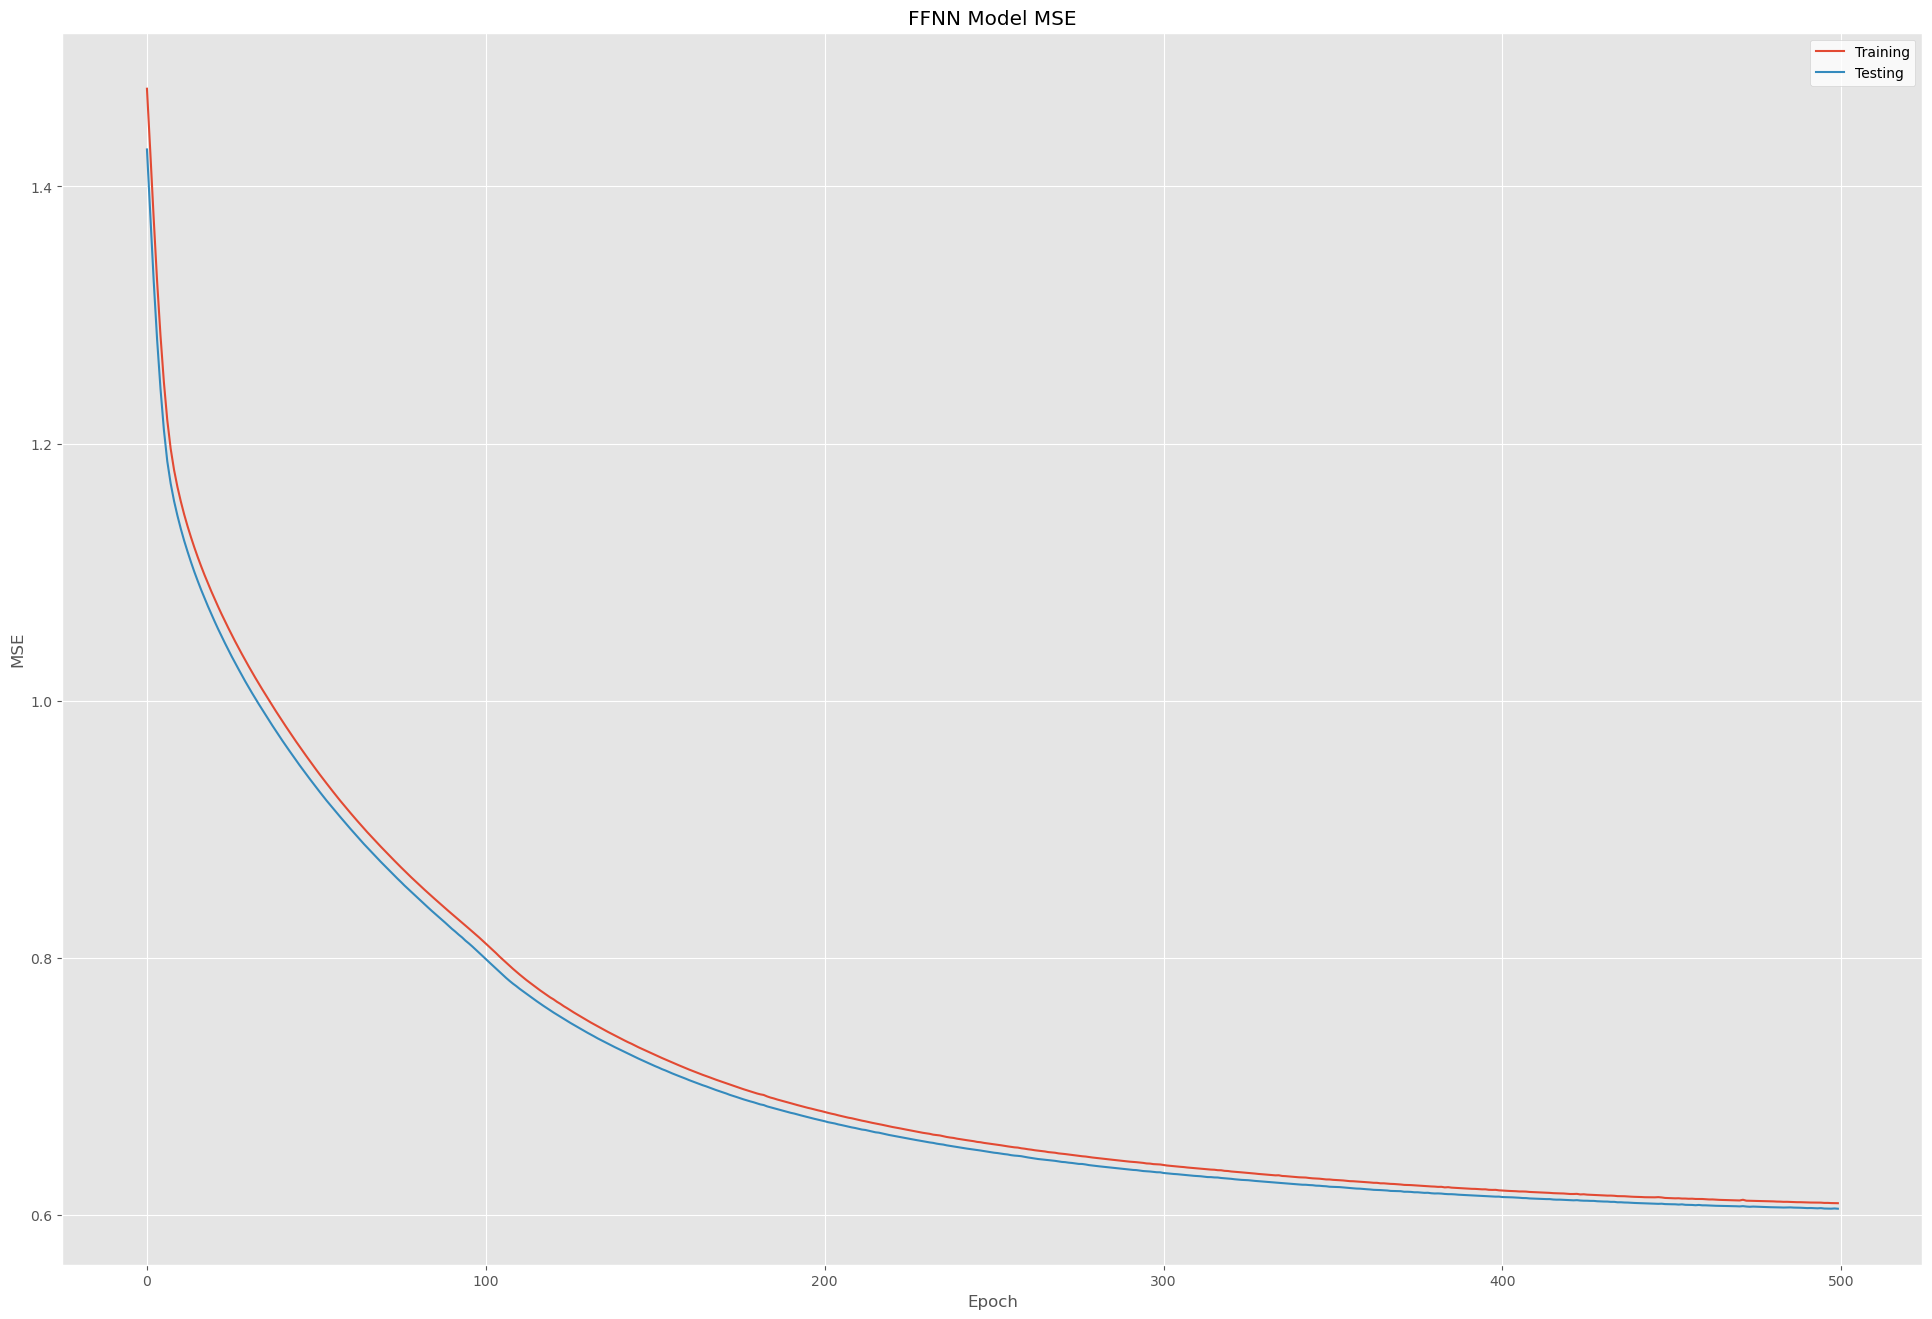

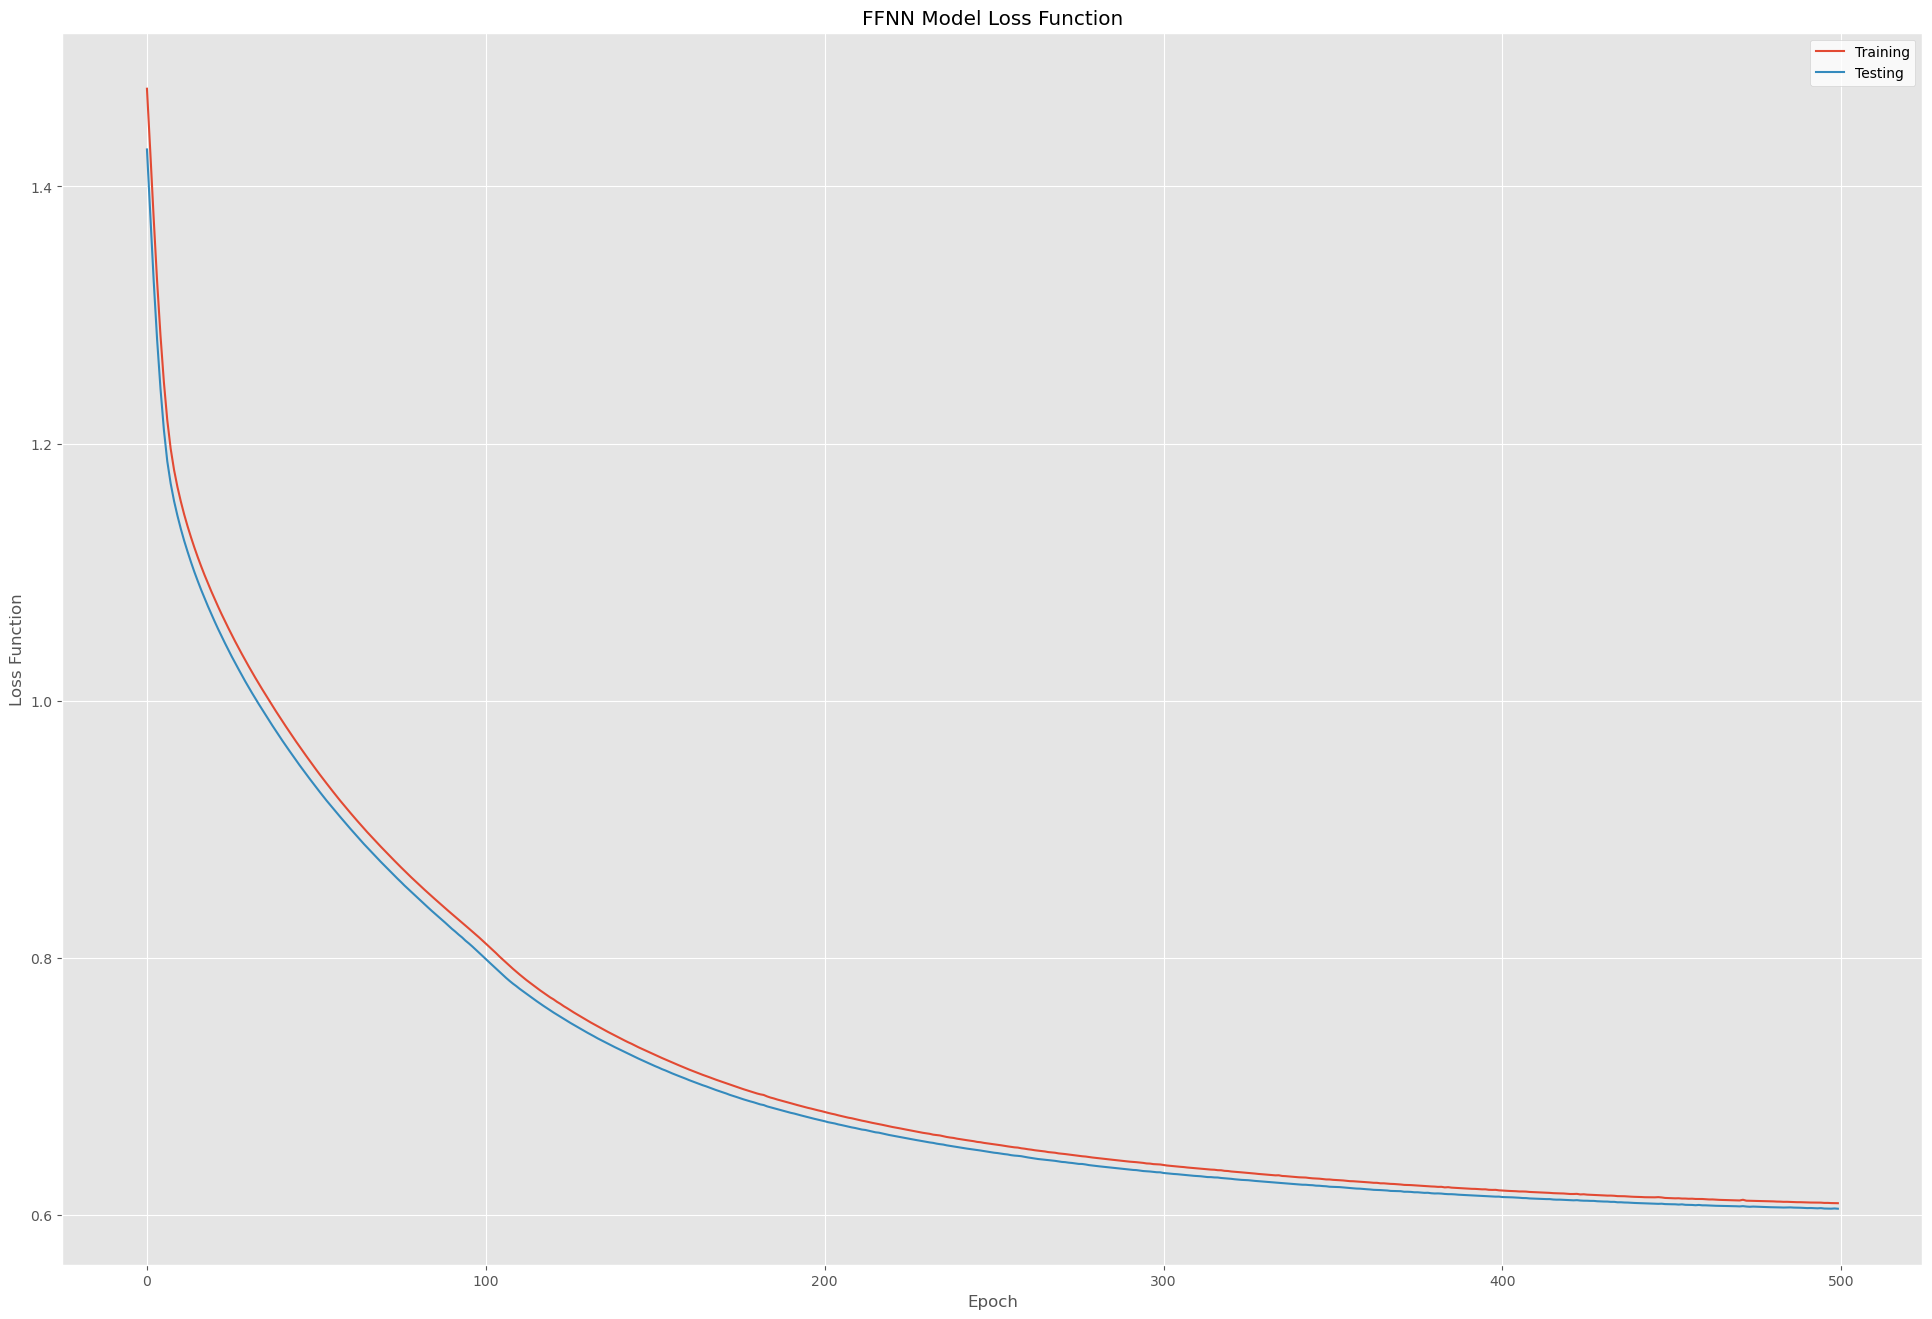

In [ ]:
# List all data in history
print(ffnn_model_ccd.history.keys())

# Plot history for mse
plt.figure(figsize=(24,16))
plt.plot(ffnn_model_ccd.history['mse'])
plt.plot(ffnn_model_ccd.history['val_mse'])
plt.title('FFNN Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], facecolor='white')
plt.show()

# Plot history for mse
plt.figure(figsize=(24,16))
plt.plot(ffnn_model_ccd.history['loss'])
plt.plot(ffnn_model_ccd.history['val_loss'])
plt.title('FFNN Model Loss Function')
plt.ylabel('Loss Function')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], facecolor='white')
plt.show()

In [ ]:
# Summarize the model
ffnn_model.summary()
print(100*'-')

# Report the model parameters (weights and biases)
print('Fitted model parameters:')
for layer in ffnn_model.layers:
    print('Layer: ', layer.name) 
    print('Weights: ', layer.get_weights()[0]) 
    print('Biases: ', layer.get_weights()[1]) 

print(100*'-')

Model: "FFNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 8)                 72        
                                                                 
 Hidden_Layer_2 (Dense)      (None, 4)                 36        
                                                                 
 Output_Layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
----------------------------------------------------------------------------------------------------
Fitted model parameters:
Layer:  Hidden_Layer_1
Weights:  [[ 2.41773158e-01  7.41582096e-01 -9.82126951e-01  7.63195276e-01
   1.70980439e-01 -2.25956768e-01  4.75726336e-01 -1.80227280e-01]
 [ 8.63487646e-02  1.35240182e

In [ ]:
import sklearn.metrics as sm
print("R2 score taining  =", round(sm.r2_score(y_scaled_train,
ffnn_model.predict(X_scaled_train)), 2))
print("R2 score testing =", round(sm.r2_score(y_scaled_test, ffnn_model.predict(X_scaled_test)), 2))

452/452 [==============================] - 0s 566us/step
R2 score taining  = 0.39
194/194 [==============================] - 0s 581us/step
R2 score testing = 0.38


(c) <b>Experimentation:</b>  
Build a structured procedure to tune the hyperparameters of the FFNN model. There is no general recipe for this exercise—it is up to you to design a systematic approach on how to optimize your FFNN and ultimately improve its performance. Report the final output and the interim results, and provide a rationale for each of your modeling/experimentation choices. Compare the in-sample and out-of-sample performance of your final model with the model you have initially implemented in the previous step in this exercise, as well as with the supervised learning models considered in the Machine Learning Homework 2. Discuss your findings.
**Hint**: Keep in mind that this exercise can easily become time consuming, and try to keep it relatively simple and to spilt your experimentation in smaller chunks of work if you are using a detailed grid search procedure.

*Now let's try to tune our hyperpameters with the help of the scikit-learn cross validation.*

In [ ]:
# Define function for KerasClassifier
def create_ffnn_model(activation='relu', loss='mse',optimizer='adam',neurons=16):
    # create model
    model = Sequential()
    model.add(Dense(neurons, activation=activation, kernel_initializer='he_uniform', input_dim=X_scaled_train.shape[1]))
    model.add(Dense(neurons, activation=activation, kernel_initializer='he_uniform'))
    model.add(Dense(1, name='Output_Layer')) 
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])
    return model

In [ ]:
# Define the cross-validation approach
n_cv_ffnn = 5

# Instantiate KerasClassifier model
ffnn_classifier_model = KerasClassifier(build_fn=create_ffnn_model, verbose=0)

# Define the grid search parameters
search_space = dict()
search_space['batch_size'] = [32, 1024]
search_space['epochs']     = [100, 200]
search_space['activation'] = ['softmax','PReLU'] 
search_space['loss']       = ['mse']
search_space['optimizer']  = ['Adam']

# Create an instance of the class GridSearchCV with desired characteristics
ffnn_grid_search_cv = GridSearchCV(estimator=ffnn_classifier_model, 
                                   param_grid=search_space, 
                                   scoring='neg_mean_squared_error', 
                                   cv=n_cv_ffnn, 
                                   n_jobs=-1)


# Run the search algorithm and summarize resuts 
ffnn_grid_search_cv.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {ffnn_grid_search_cv.best_score_:.4f}')
print('Best hyperparameters: %s' % ffnn_grid_search_cv.best_params_)

means  = ffnn_grid_search_cv.cv_results_['mean_test_score']
stds   = ffnn_grid_search_cv.cv_results_['std_test_score']
params = ffnn_grid_search_cv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

C:\Users\vnikacevic\AppData\Local\Temp\ipykernel_26464\3893569237.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ffnn_classifier_model = KerasClassifier(build_fn=create_ffnn_model, verbose=0)


Best score: -3.5249
Best hyperparameters: {'activation': 'softmax', 'batch_size': 32, 'epochs': 100, 'loss': 'mse', 'optimizer': 'Adam'}
-3.524892 (0.079899) with: {'activation': 'softmax', 'batch_size': 32, 'epochs': 100, 'loss': 'mse', 'optimizer': 'Adam'}
-3.524892 (0.079899) with: {'activation': 'softmax', 'batch_size': 32, 'epochs': 200, 'loss': 'mse', 'optimizer': 'Adam'}
-3.524892 (0.079899) with: {'activation': 'softmax', 'batch_size': 1024, 'epochs': 100, 'loss': 'mse', 'optimizer': 'Adam'}
-3.524892 (0.079899) with: {'activation': 'softmax', 'batch_size': 1024, 'epochs': 200, 'loss': 'mse', 'optimizer': 'Adam'}
-3.524892 (0.079899) with: {'activation': 'PReLU', 'batch_size': 32, 'epochs': 100, 'loss': 'mse', 'optimizer': 'Adam'}
-3.524892 (0.079899) with: {'activation': 'PReLU', 'batch_size': 32, 'epochs': 200, 'loss': 'mse', 'optimizer': 'Adam'}
-3.524892 (0.079899) with: {'activation': 'PReLU', 'batch_size': 1024, 'epochs': 100, 'loss': 'mse', 'optimizer': 'Adam'}
-3.524956

Comment:  
*We first started with the grid search procedure presented in the lectures and picked up two layers since we wanted to have as little parameters as possible. Then for the activation function in the output layer we picked up the constant, since we wanted the model to be able to predict wide range of y values i.e., we chose sigmoid function that the model would be able to accurately predict values of y in range from 0 to 1.*

In [ ]:
print("MSE taining  =", round(sm.mean_squared_error(y_scaled_train,
ffnn_grid_search_cv.predict(X_scaled_train)), 2))
print("MSE testing =", round(sm.mean_squared_error(y_scaled_test, ffnn_grid_search_cv.predict(X_scaled_test)), 2))

452/452 [==============================] - 0s 598us/step
MSE taining  = 3.54
194/194 [==============================] - 0s 609us/step
MSE testing = 3.51


Comment:  
*For the metrics we chose $MSE$ instead of $R^2$, as in the epochs, due to the library, negative MSE is reported. We got negative $R^2$ obviously due to the fact that our model is non linear. $R^2$ can be used in linear regression, provided that linearity property is satisfied. $R^2$ is negative since sum of squares error $SSE$ is greater than the sum of squares total $SST$.  
$R^2$ can also be expressed as a function of mean squared error ($MSE$).  
The following equation represents the same. You may notice that as $MSE$ increases, the value of $R^2$ will decrease owing to the fact that the ratio of $MSE$ and $Var(y)$ will increase resulting in the decrease in the value of $R^2$.  
The relationship between $R^2$ abd $MSE$:*$$ R^2 = 1 - \frac{SSE}{SST}$$ $$R^2 = 1 - \frac{\frac{1}{n}\sum_{t=1}^{n}(y^{(t)} - \hat{y}^{(t)})^2}{\frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - \mu_{y})^2}$$ $$ R^2 = 1 - \frac{MSE}{Var{(y)}}$$

Comment:  
*As an alternative we tried K fold algoritm, and we chose 4 folds.*

In [ ]:
X=df_california_housing.drop('MedHouseVal',axis=1)
y=df_california_housing['MedHouseVal']
std_x_scalar = StandardScaler().fit(X)
std_y_scalar = StandardScaler().fit(np.array(y).reshape(-1, 1))


X_scaled = std_x_scalar.transform(X)
y_scaled = std_y_scalar.transform(np.array(y).reshape(-1, 1))

In [ ]:
from tensorflow_addons.metrics import RSquare
# Define function for KerasClassifier
def create_ffnn_model(activation='relu', loss='mse',optimizer='adam',neurons=8):
    # create model
    model = Sequential()
    model.add(Dense(neurons, activation=activation, kernel_initializer='he_uniform', input_dim=X_scaled_train.shape[1]))
    model.add(Dense(neurons, activation=activation, kernel_initializer='he_uniform'))
    model.add(Dense(1, name='Output_Layer')) 
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=[RSquare()])
    return model

In [ ]:
k = 4
num_val_samples = len(X_scaled) // k
num_epochs = 100
all_scores = [] 
for i in range(k):
    print(f"Processing fold #{i+1}")
    val_data = X_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_scaled[:i * num_val_samples],X_scaled[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y_scaled[:i * num_val_samples],y_scaled[(i + 1) * num_val_samples:]],axis=0)
    model = create_ffnn_model() 
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=16, verbose=0)
    print(model.evaluate(val_data, val_targets, verbose=0))
    all_scores.append(model.evaluate(val_data, val_targets, verbose=0))

Processing fold #1
[0.29348233342170715, 0.6565337777137756]
Processing fold #2
[0.32796546816825867, 0.6791138648986816]
Processing fold #3
[0.31363287568092346, 0.5891578197479248]
Processing fold #4
[0.40332069993019104, 0.6505182981491089]


In [ ]:
mse=[i[0] for i in all_scores]
np.mean(mse)

r2=[i[1] for i in all_scores]
print(np.mean(mse),np.mean(r2))

0.3162762373685837 0.6650305241346359


Comment:  
*It turns out that K fold produced the best performance with the highest $R^{2}$ and lowest $MSE$, hence we conclude the  K fold to be an ultimate winner.*